<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_SVR_Bajas_TEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión con soporte máquina vectorial (SVR)
# objetivo: 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Nueva sección

In [55]:
data1 = pd.read_csv('/content/drive/My Drive/Dataset/DBajas_TEC.txt',delimiter='~')
x = data1.iloc [:,:-1].values
y = data1.iloc [:,3].values

### Codificar datos categóricos

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder  = LabelEncoder()
x[:,0] = labelencoder.fit_transform(x[:,0])
x[:,1] = labelencoder.fit_transform(x[:,1])
ct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[0])],remainder='passthrough')
ct1 = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[1])],remainder='passthrough')

In [ ]:
pd.DataFrame(x)

In [ ]:
pd.DataFrame(y)

### Dividimos los datos en entrenamiento y test

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state=0)

In [ ]:
pd.DataFrame(x_test)

### Escalamos los datos

In [ ]:
""" from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
"""
# Escalado de variables
# en este ejemplo no es necesario lo dejaremos comentariado
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x= sc_x.fit_transform(x)
y= sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
pd.DataFrame(y)

### Ajustar las caracteristicas SVR
# Ajustar el modelo SVR

In [ ]:
from sklearn.svm import SVR
regression = SVR(kernel='rbf')
regression.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = sc_y.inverse_transform(regression.predict(sc_x.transform([[6.5]]) ))

In [ ]:
pd.DataFrame(y_pred)

,0
0,170370.020407


### Visualizar los resultados

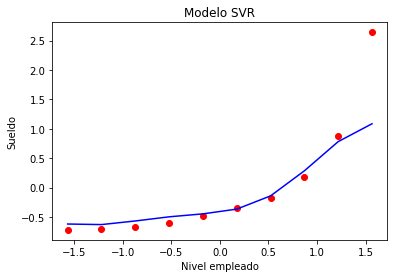

In [ ]:
plt.scatter (x,y, color="Red")
plt.plot (x,regression.predict(x),color="blue")
plt.title ("Modelo SVR")
plt.xlabel("Nivel empleado")
plt.ylabel("Sueldo")
plt.show()

In [ ]:
x_valor = sc_x.inverse_transform(x)
y_valor = sc_y.inverse_transform(y)
y_predic_valor = sc_y.inverse_transform(regression.predict(x))

In [ ]:
pd.DataFrame(x_valor)

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,10.0


In [ ]:
pd.DataFrame(y_predic_valor)

,0
0,73474.156157
1,70786.945846
2,88213.009021
3,108254.985750
4,122574.522506
5,145503.106886
6,209410.231329
7,330606.892046
8,471671.955873
9,557821.758999


In [ ]:
pd.DataFrame(y_valor)

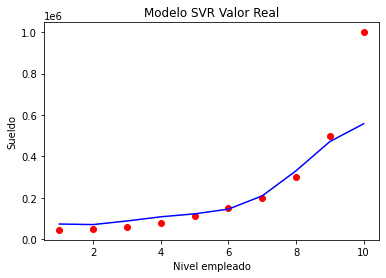

In [ ]:
x_grid= np.arange(min(x_valor),max(x_valor),0.01)
x_grid= x_grid.reshape(len(x_grid),1)
plt.scatter(x_valor,y_valor,color="Red")
plt.plot(x_valor,y_predic_valor,color="blue")
plt.title("Modelo SVR Valor Real")
plt.xlabel("Nivel empleado")
plt.ylabel("Sueldo")
plt.show()